# 2_Data_Preprocessing

## Imports:

In [1]:
import os
from PIL import Image
import matplotlib.pyplot as plt
import shutil
import random

## Data Cleaning

### Corrupte afbeeldingen verwijderen:

In [4]:
image_folder = "images"
painter_dirs = os.listdir(image_folder)
painter_dirs

['Mondriaan', 'Picasso', 'Rembrandt', 'Rubens']

In [3]:
try:
    for painter_dir in painter_dirs:
        painter_images = os.listdir(os.path.join(image_folder, painter_dir))
        for painter_image in painter_images:
            image_path = os.path.join(image_folder, painter_dir, painter_image)
            with Image.open(image_path) as img:
                pass
except Exception as e:
    os.remove(image_path)
    print(f"Removed {image_path} due to error: {e}")


### Andere formaten converteren

Andere formaten oplijsten

In [4]:
def get_other_formats():
    other_formats = {}
    
    for painter_dir in painter_dirs:
        painter_images = os.listdir(os.path.join(image_folder, painter_dir))
        
        non_jpg_files = []
        for painter_image in painter_images:
            image_path = os.path.join(image_folder, painter_dir, painter_image)
            with Image.open(image_path) as img:
                if img.mode != "RGB":
                    non_jpg_files.append(painter_image)
        
        if non_jpg_files:
            other_formats[painter_dir] = non_jpg_files
    
    return other_formats

In [5]:
other_formats = get_other_formats()
other_formats

{'Mondriaan': ['tableay-no-iv-lozenge-composition.png'],
 'Picasso': ['bust-of-woman-with-yellow-ribbon-jacqueline-1962.jpg',
  'dream-and-lie-of-franco-1937.jpg',
  'large.jpg',
  'picasso_meisje_met_duif.png',
  'portrait-of-child-1951.jpg',
  'the-eight-names-of-picasso-1970.jpg',
  'the-girls-of-avignon-study-1907.jpg',
  'untitled-1966.jpg',
  'untitled-1970.jpg',
  'woman-with-hat-1962-1.jpg']}

Andere formaten displayen

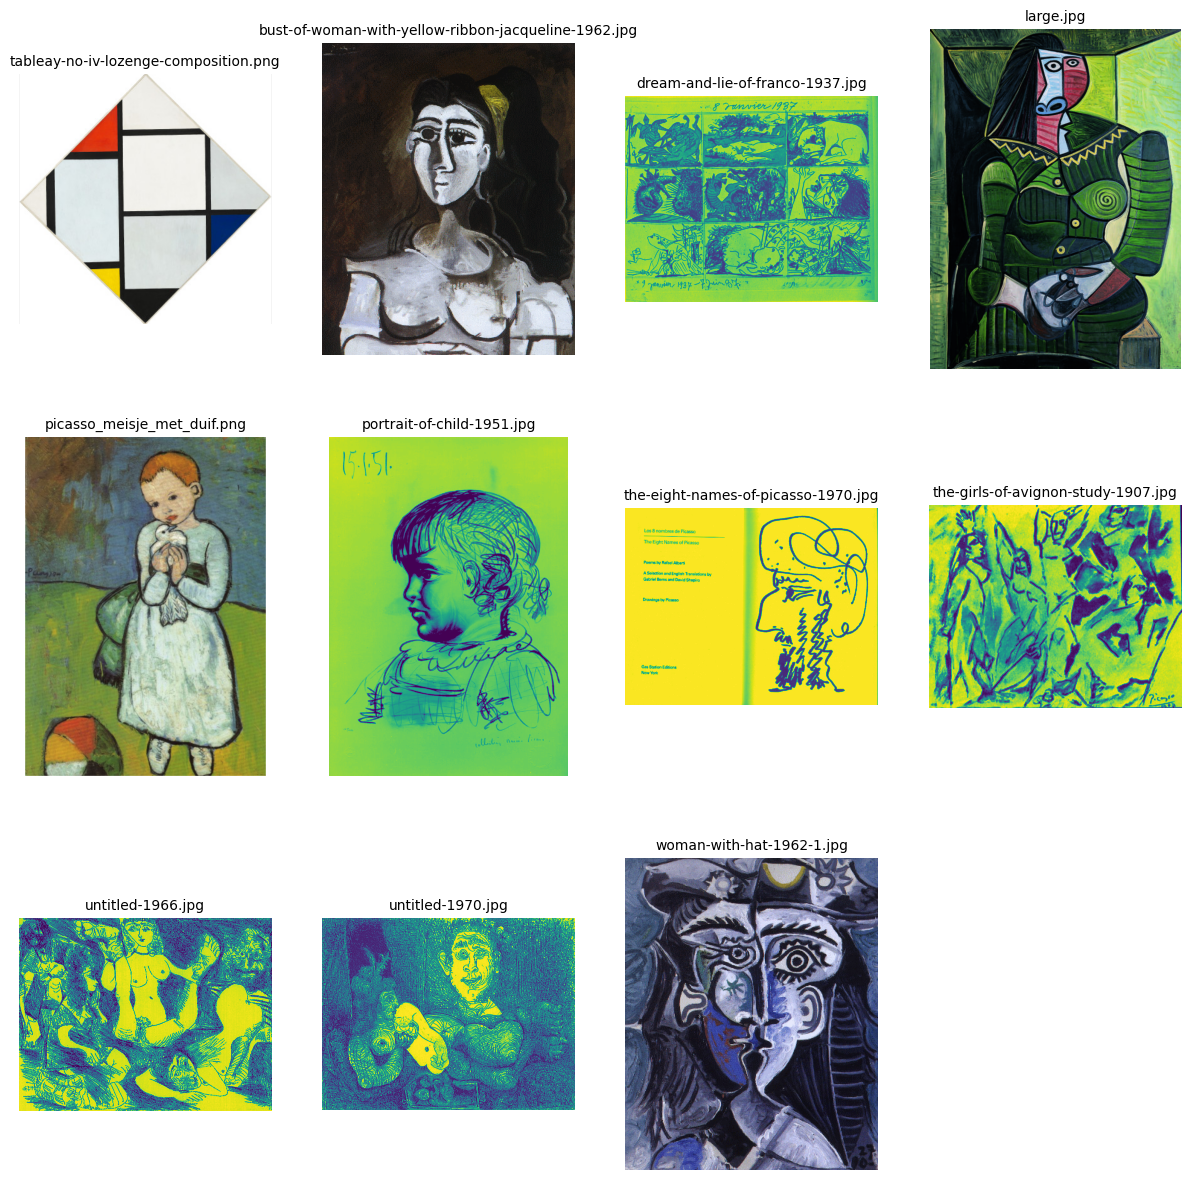

In [6]:
other_format_images = []
for artist, image_list in other_formats.items():
    for image_name in image_list:
        other_format_images.append((artist, image_name))


num_images = len(other_format_images)
cols = 4  
rows = (num_images + cols - 1) // cols  


fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 5))
axes = axes.flatten()

for i, (artist, image_name) in enumerate(other_format_images):
    image_path = os.path.join(image_folder, artist, image_name)
    
    img = Image.open(image_path)
    axes[i].imshow(img)
    axes[i].axis('off')  
    axes[i].set_title(image_name, fontsize=10)

for i in range(num_images, len(axes)):
    axes[i].axis('off')

Andere formaten converteren naar RGB en JPG

In [7]:
for artist, image_list in other_formats.items():
    for image_name in image_list:
        image_path = os.path.join(image_folder, artist, image_name)
        with Image.open(image_path) as img:
            if img.mode != 'RGB':
                img = img.convert('RGB')
                
            new_image_path = os.path.join(image_folder, artist, image_name.split('.')[0] + '.jpg')
            os.remove(image_path)
            img.save(new_image_path, 'JPEG')
            print(f"Converted {image_name} to RGB and saved as {new_image_path}")
        

Converted tableay-no-iv-lozenge-composition.png to RGB and saved as images/Mondriaan/tableay-no-iv-lozenge-composition.jpg
Converted bust-of-woman-with-yellow-ribbon-jacqueline-1962.jpg to RGB and saved as images/Picasso/bust-of-woman-with-yellow-ribbon-jacqueline-1962.jpg
Converted dream-and-lie-of-franco-1937.jpg to RGB and saved as images/Picasso/dream-and-lie-of-franco-1937.jpg
Converted large.jpg to RGB and saved as images/Picasso/large.jpg
Converted picasso_meisje_met_duif.png to RGB and saved as images/Picasso/picasso_meisje_met_duif.jpg
Converted portrait-of-child-1951.jpg to RGB and saved as images/Picasso/portrait-of-child-1951.jpg
Converted the-eight-names-of-picasso-1970.jpg to RGB and saved as images/Picasso/the-eight-names-of-picasso-1970.jpg
Converted the-girls-of-avignon-study-1907.jpg to RGB and saved as images/Picasso/the-girls-of-avignon-study-1907.jpg
Converted untitled-1966.jpg to RGB and saved as images/Picasso/untitled-1966.jpg
Converted untitled-1970.jpg to RGB 

Finale check

In [8]:
other_formats = get_other_formats()
other_formats

{}

### Afbeeldingen nummeren:

In [9]:
for painter_dir in painter_dirs:
    painter_path = os.path.join(image_folder, painter_dir)
    painter_images = os.listdir(painter_path)
    for index, painter_image in enumerate(painter_images):
        old_path = os.path.join(painter_path, painter_image)
        new_path = os.path.join(painter_path, f"{index}.jpg")       
        os.rename(old_path, new_path)

Opgekuiste dataset opslaan:

In [10]:
shutil.make_archive('cleaned_images', 'zip', image_folder)

'/mnt/c/Users/timmo/OneDrive - Hogeschool VIVES/Documenten/School 2024-2025/Deep Learning/Schilderijen-Classificatie/cleaned_images.zip'

## Dataset creatie

In [2]:
test = 0.2
train = 0.6
validation = 0.2

In [5]:
def get_dataset_counts(dataset_dir):
    painter_dirs = os.listdir(dataset_dir)
    painter_image_count = {}
    for painter in painter_dirs:
        painter_dir = os.path.join(dataset_dir, painter)
        images = os.listdir(painter_dir)
        painter_image_count[painter] = len(images)
    return painter_image_count

painter_image_count = get_dataset_counts(image_folder)
painter_image_count

{'Mondriaan': 330, 'Picasso': 1529, 'Rembrandt': 260, 'Rubens': 682}

### Creatie imbalanced dataset

In [13]:
dataset_name = "imbalanced_dataset"
os.makedirs(dataset_name, exist_ok=True)

for painter in painter_dirs:
    train_dir = os.path.join(dataset_name, "train", painter)
    os.makedirs(train_dir, exist_ok=True)
    validation_dir = os.path.join(dataset_name, "validation", painter)
    os.makedirs(validation_dir, exist_ok=True)
    test_dir = os.path.join(dataset_name, "test", painter)
    os.makedirs(test_dir, exist_ok=True)

    painter_dir = os.path.join(image_folder, painter)
    images = os.listdir(painter_dir)
    train_count = int(train * painter_image_count[painter])
    validation_count = int(validation * painter_image_count[painter])

    for i, image in enumerate(images):
        image_path = os.path.join(painter_dir, image)
        if i < train_count:
            new_image_path = os.path.join(train_dir, image)
        elif i < train_count + validation_count:
            new_image_path = os.path.join(validation_dir, image)
        else:
            new_image_path = os.path.join(test_dir, image)
        shutil.copy(image_path, new_image_path)


In [19]:
get_dataset_counts(f"{dataset_name}/train"), get_dataset_counts(f"{dataset_name}/validation"), get_dataset_counts(f"{dataset_name}/test")

({'Mondriaan': 198, 'Picasso': 917, 'Rembrandt': 156, 'Rubens': 409},
 {'Mondriaan': 66, 'Picasso': 305, 'Rembrandt': 52, 'Rubens': 136},
 {'Mondriaan': 66, 'Picasso': 307, 'Rembrandt': 52, 'Rubens': 137})

In [20]:
shutil.make_archive('imbalanced_dataset', 'zip', dataset_name)

'/mnt/c/Users/timmo/OneDrive - Hogeschool VIVES/Documenten/School 2024-2025/Deep Learning/Schilderijen-Classificatie/imbalanced_dataset.zip'

### Creatie undersampled dataset

In [21]:
dataset_name = "undersampled_dataset"
min_images = min(painter_image_count.values())

for painter in painter_dirs:
    train_dir = os.path.join(dataset_name, "train", painter)
    os.makedirs(train_dir, exist_ok=True)
    validation_dir = os.path.join(dataset_name, "validation", painter)
    os.makedirs(validation_dir, exist_ok=True)
    test_dir = os.path.join(dataset_name, "test", painter)
    os.makedirs(test_dir, exist_ok=True)

    painter_dir = os.path.join(image_folder, painter)
    images = os.listdir(painter_dir)
    train_count = int(train * min_images)
    validation_count = int(validation * min_images)
    test_count = int(test * min_images)

    for i, image in enumerate(images):
        image_path = os.path.join(painter_dir, image)
        if i < train_count:
            new_image_path = os.path.join(train_dir, image)
        elif i < train_count + validation_count:
            new_image_path = os.path.join(validation_dir, image)
        elif i < train_count + validation_count + test_count:
            new_image_path = os.path.join(test_dir, image)
        shutil.copy(image_path, new_image_path)

In [22]:
get_dataset_counts(f"{dataset_name}/train"), get_dataset_counts(f"{dataset_name}/validation"), get_dataset_counts(f"{dataset_name}/test")

({'Mondriaan': 156, 'Picasso': 156, 'Rembrandt': 156, 'Rubens': 156},
 {'Mondriaan': 52, 'Picasso': 52, 'Rembrandt': 52, 'Rubens': 52},
 {'Mondriaan': 52, 'Picasso': 52, 'Rembrandt': 52, 'Rubens': 52})

In [23]:
shutil.make_archive('undersampled_dataset', 'zip', dataset_name)

'/mnt/c/Users/timmo/OneDrive - Hogeschool VIVES/Documenten/School 2024-2025/Deep Learning/Schilderijen-Classificatie/undersampled_dataset.zip'

### Creatie oversampled dataset

In [24]:
dataset_name = "oversampled_dataset"
max_images = max(painter_image_count.values()) 

for painter in painter_dirs:
    train_dir = os.path.join(dataset_name, "train", painter)
    os.makedirs(train_dir, exist_ok=True)
    validation_dir = os.path.join(dataset_name, "validation", painter)
    os.makedirs(validation_dir, exist_ok=True)
    test_dir = os.path.join(dataset_name, "test", painter)
    os.makedirs(test_dir, exist_ok=True)

    painter_dir = os.path.join(image_folder, painter)
    images = os.listdir(painter_dir)
    
    if len(images) < max_images:
        oversampled_images = images * (max_images // len(images)) + random.sample(images, max_images % len(images))
    else:
        oversampled_images = images[:max_images]  

    train_count = int(train * max_images)
    validation_count = int(validation * max_images)
    test_count = int(test * max_images)

    for i, image in enumerate(oversampled_images):
        image_path = os.path.join(painter_dir, image)

        if i < train_count:
            new_image_name = f"{i + 1}.jpg"
            new_image_path = os.path.join(train_dir, new_image_name)
        elif i < train_count + validation_count:
            new_image_name = f"{i + 1 - train_count}.jpg"
            new_image_path = os.path.join(validation_dir, new_image_name)
        elif i < train_count + validation_count + test_count:
            new_image_name = f"{i + 1 - train_count - validation_count}.jpg"
            new_image_path = os.path.join(test_dir, new_image_name)

        shutil.copy(image_path, new_image_path)

In [25]:
get_dataset_counts(f"{dataset_name}/train"), get_dataset_counts(f"{dataset_name}/validation"), get_dataset_counts(f"{dataset_name}/test")

({'Mondriaan': 917, 'Picasso': 917, 'Rembrandt': 917, 'Rubens': 917},
 {'Mondriaan': 305, 'Picasso': 305, 'Rembrandt': 305, 'Rubens': 305},
 {'Mondriaan': 305, 'Picasso': 305, 'Rembrandt': 305, 'Rubens': 305})

In [26]:
shutil.make_archive('oversampled_dataset', 'zip', dataset_name)

'/mnt/c/Users/timmo/OneDrive - Hogeschool VIVES/Documenten/School 2024-2025/Deep Learning/Schilderijen-Classificatie/oversampled_dataset.zip'

### Creatie kleinere oversampled dataset

In [11]:
dataset_name = "smaller_oversampled_dataset"
max_images = max(painter_image_count.values()) 

for painter in painter_dirs:
    train_dir = os.path.join(dataset_name, "train", painter)
    os.makedirs(train_dir, exist_ok=True)
    validation_dir = os.path.join(dataset_name, "validation", painter)
    os.makedirs(validation_dir, exist_ok=True)
    test_dir = os.path.join(dataset_name, "test", painter)
    os.makedirs(test_dir, exist_ok=True)

    painter_dir = os.path.join(image_folder, painter)
    images = os.listdir(painter_dir)
    
    if len(images) < max_images:
        oversampled_images = images * (max_images // len(images)) + random.sample(images, max_images % len(images))
    else:
        oversampled_images = images[:max_images]  

    train_count = 600
    validation_count = 200
    test_count = 200

    for i, image in enumerate(oversampled_images):
        image_path = os.path.join(painter_dir, image)

        if i < train_count:
            new_image_name = f"{painter}_train_{i + 1}.jpg"
            new_image_path = os.path.join(train_dir, new_image_name)
        elif i < train_count + validation_count:
            new_image_name = f"{painter}_validation_{i + 1 - train_count}.jpg"
            new_image_path = os.path.join(validation_dir, new_image_name)
        elif i < train_count + validation_count + test_count:
            new_image_name = f"{painter}_test_{i + 1 - train_count - validation_count}.jpg"
            new_image_path = os.path.join(test_dir, new_image_name)

        shutil.copy(image_path, new_image_path)

In [12]:
get_dataset_counts(f"{dataset_name}/train"), get_dataset_counts(f"{dataset_name}/validation"), get_dataset_counts(f"{dataset_name}/test")

({'Mondriaan': 600, 'Picasso': 600, 'Rembrandt': 600, 'Rubens': 600},
 {'Mondriaan': 200, 'Picasso': 200, 'Rembrandt': 200, 'Rubens': 200},
 {'Mondriaan': 200, 'Picasso': 200, 'Rembrandt': 200, 'Rubens': 200})

In [13]:
shutil.make_archive('smaller_oversampled_dataset', 'zip', dataset_name)

'c:\\Users\\timmo\\OneDrive - Hogeschool VIVES\\Documenten\\School 2024-2025\\Deep Learning\\Schilderijen-Classificatie\\smaller_oversampled_dataset.zip'